In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score

In [ ]:
data = pd.read_csv("/content/IMDb Movies India.csv",encoding='latin1',error_bad_lines=False, engine="python")

<ipython-input-3-4ef9fca28c92>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("/content/IMDb Movies India.csv",encoding='latin1',error_bad_lines=False, engine="python")


In [ ]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
data.shape

(15509, 10)

In [ ]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
data.duplicated().sum()

6

In [9]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [10]:
data['Duration']= data['Duration'].str.replace('min','').apply(pd.to_numeric)

In [11]:
data["Votes"]=data["Votes"].replace("$5.16M", 516)
data["Votes"] = pd.to_numeric(data['Votes'].str.replace(',',''))

In [12]:
data.dropna(subset=['Year'],inplace=True)
data.dropna(subset=['Genre'],inplace=True)
data['Rating'].fillna(data
['Rating'].mode().max(),inplace=True)
data['Duration'].fillna(data['Duration'].mean(),inplace=True)
data['Votes'].fillna(data['Votes'].mean(),inplace=True)


In [13]:
data.dropna(inplace=True)

In [14]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [15]:
data.dtypes

Name         object
Year         object
Duration    float64
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

Text(0.5, 1.0, 'Director with most Movies')

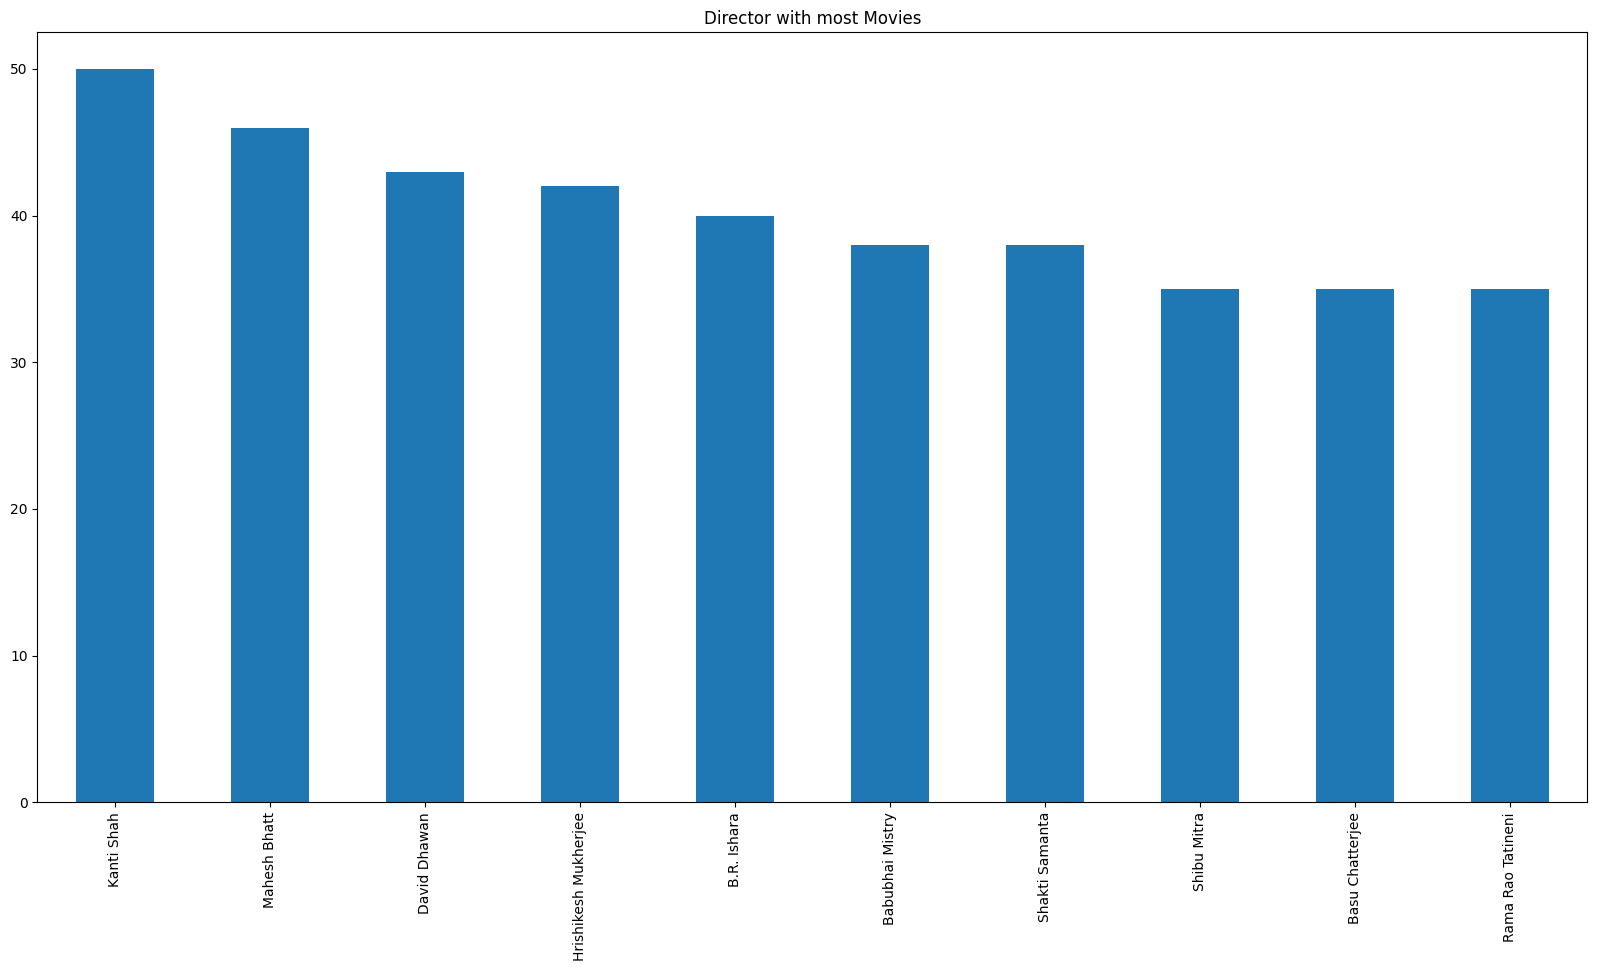

In [16]:
plt.figure(figsize=(20,10))
data['Director'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Director with most Movies')

Text(0.5, 1.0, 'Actor with Many Movies')

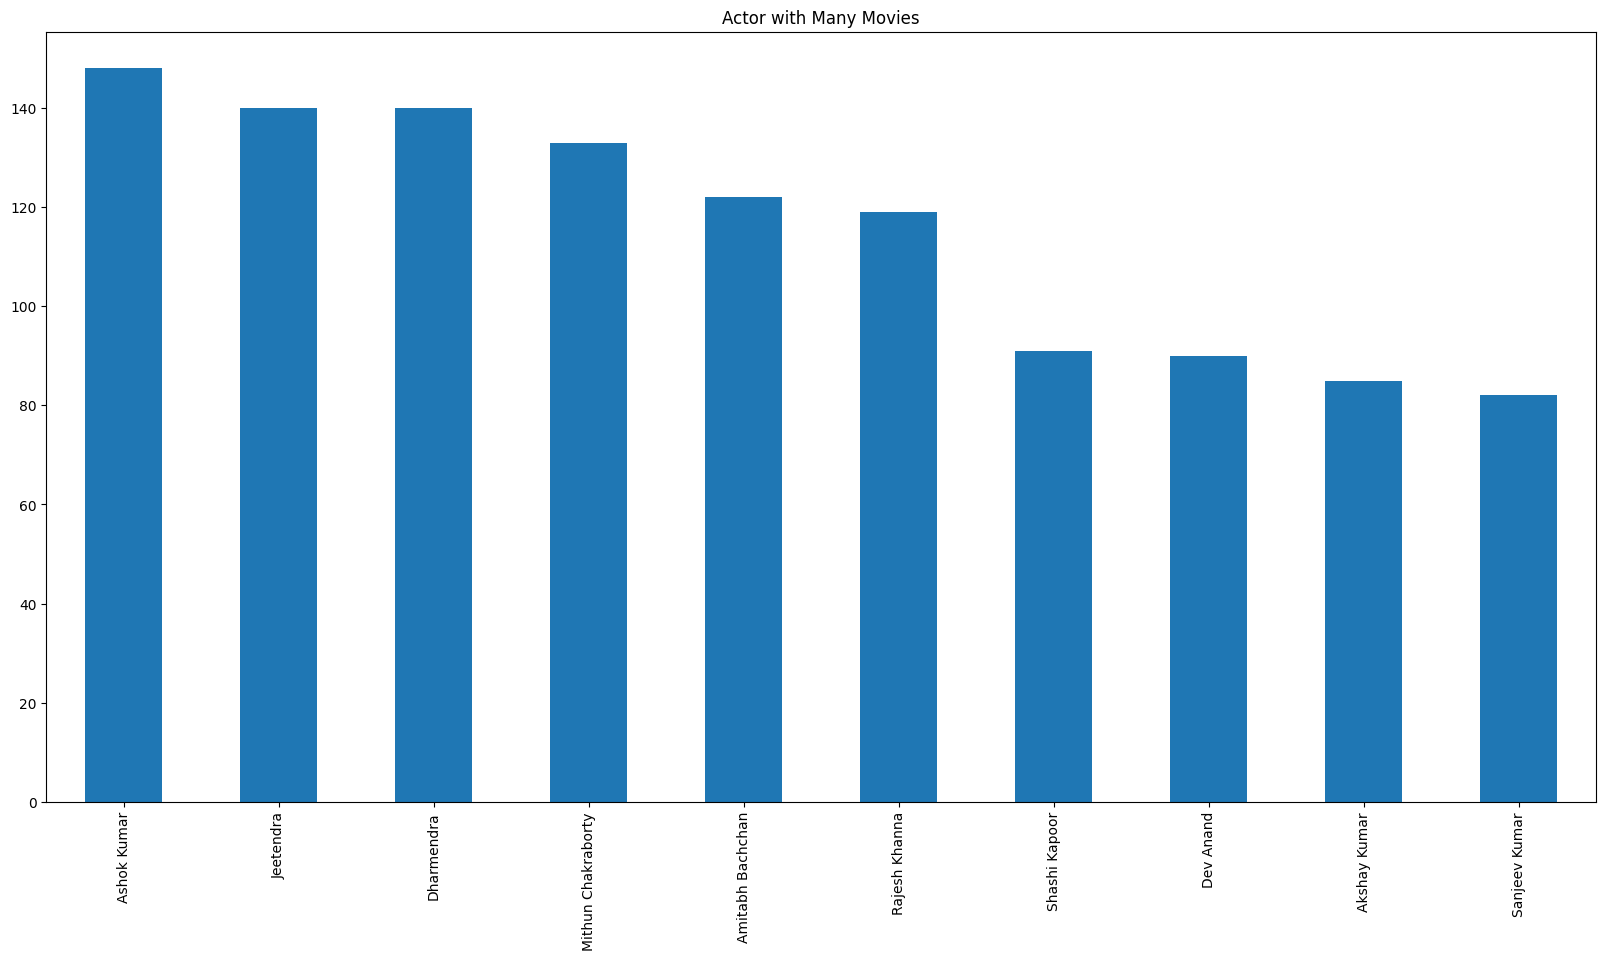

In [17]:
plt.figure(figsize=(20,10))
data['Actor 1'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Actor with Many Movies')

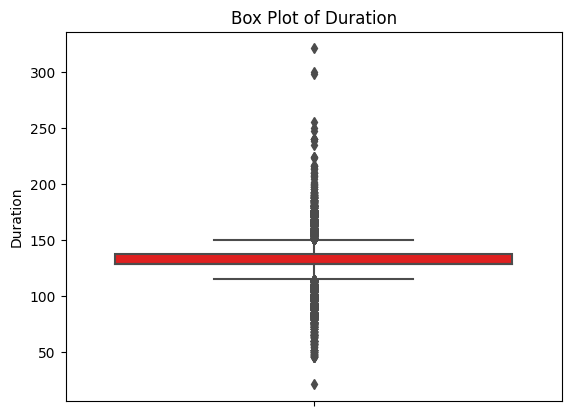

In [18]:
ax = sns.boxplot(data=data, y='Duration', color='red')
ax.set_ylabel('Duration')
ax.set_title('Box Plot of Duration')
plt.show()

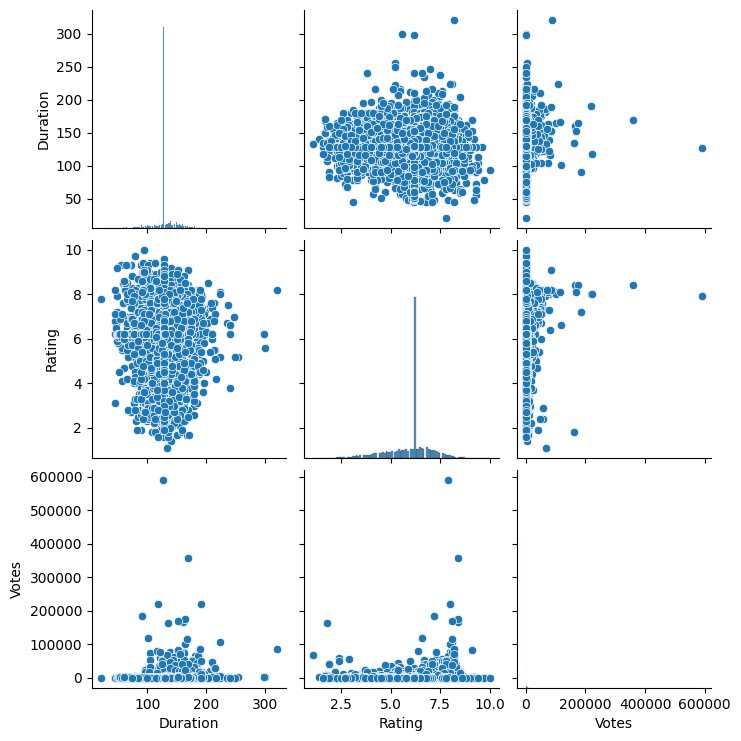

In [19]:
sns.pairplot(data)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_columns].corr(method='spearman')

Text(0.5, 1.0, 'Distribution of Movie Ratings')

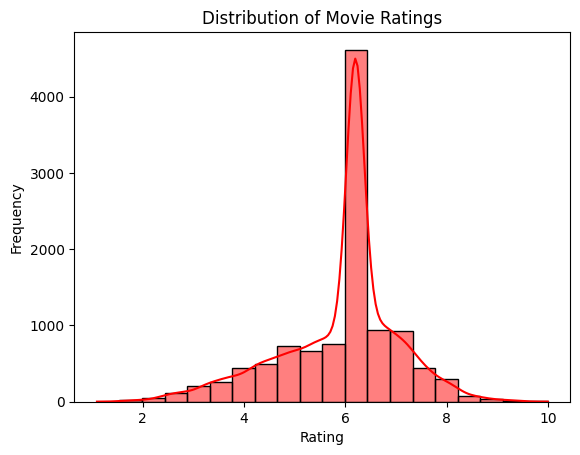

In [20]:
ax = sns.histplot(data=data, x="Rating", bins=20, kde=True, color='red')
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Ratings')

Text(0.5, 1.0, 'Box Plot of Movie Ratings')

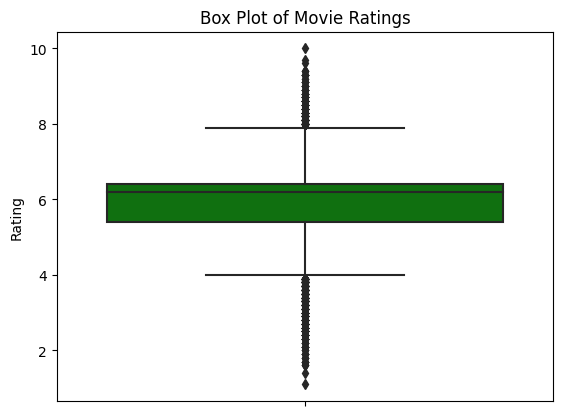

In [21]:
ax = sns.boxplot(data=data, y='Rating', color='green')
ax.set_ylabel('Rating')
ax.set_title('Box Plot of Movie Ratings')

In [22]:
import plotly.express as px
dfg = data['Director'].value_counts().head(20)
fig = px.bar(dfg)
fig.show()

In [23]:
act = data['Actor 1'].value_counts().head(20)
fig = px.bar(act)
fig.show()

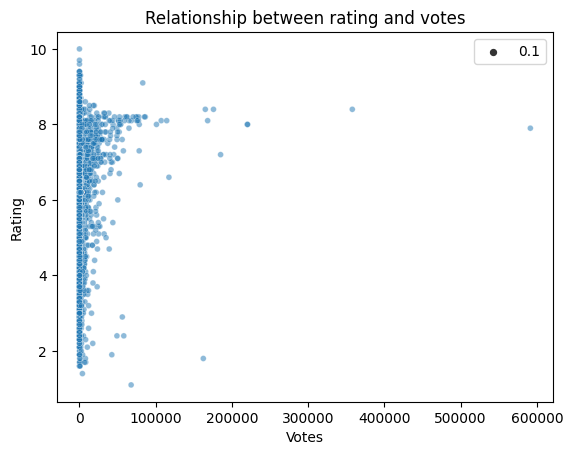

In [24]:
sns.scatterplot(data=data, x='Votes', y='Rating', size=0.1, alpha=0.5)
plt.title('Relationship between rating and votes')
plt.show()

In [25]:
data['Year'] = data['Year'].str.extract('(\d+)').astype(float)

In [26]:
X = data[['Year', 'Duration', 'Votes']]
y = data['Rating']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
print('Shape of training features: ', X_train.shape)
print('Shape of training target: ', y_train.shape)
print('Shape of testing features: ', X_test.shape)
print('Shape of testing target: ', y_test.shape)

Shape of training features:  (8868, 3)
Shape of training target:  (8868,)
Shape of testing features:  (2218, 3)
Shape of testing target:  (2218,)


In [29]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [30]:
print('\nRandom Forest Regressor Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, rf_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_pred))
print('R2 Score:', r2_score(y_test, rf_pred))


Random Forest Regressor Metrics:
Mean Squared Error: 1.0134501603209534
Mean Absolute Error: 0.6250540307375406
R2 Score: 0.23294143794519262


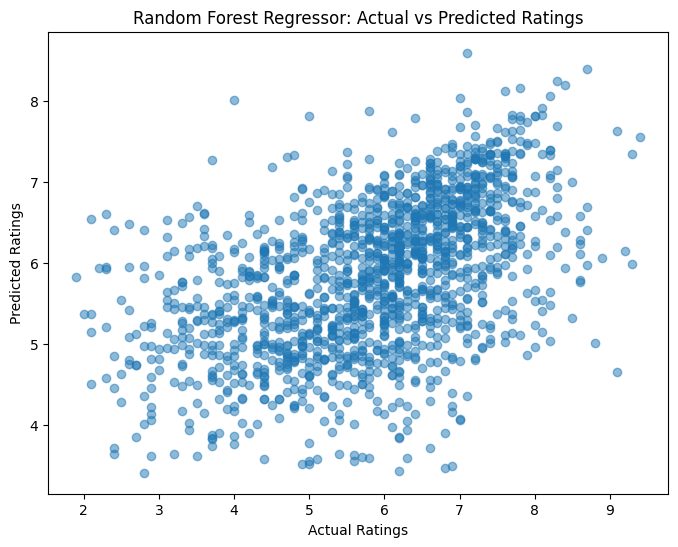

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.title('Random Forest Regressor: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

Conclusion:

1)The years 1948, 1940 and 1950 had high average movie ratings.

2)The trend of number of movie release per year has increased from 1917 to 2020.

3)The top high avearge rated genres are (History, Romance), (Documentary, History, Family) and (Documentary, Music)

4)The top high avearge rated directors are Saif Ali Sayeed, Sriram Raja and Bobby Kumar.

5)The top high avearge rated actors are Ahaan jha, Raj Banerjee and Dharmendra Ahir.